Capture methods provided by [github.com/nickochnack/OpenCV-Basics](github.com/nickochnack/OpenCV-Basics)

Calibration steps followed from [OpenCV: Camera Calibration](https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html)


### Import Dependencies

In [51]:
import cv2 as cv
import os
import glob
import numpy as np
from matplotlib import pyplot as plt

### Take a photo

In [44]:
def take_photo(filename,type="jpg"):
    cap = cv.VideoCapture(2)
    cap.set(cv.CAP_PROP_AUTOFOCUS, 0)
    ret, frame = cap.read()
    color = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    print("press 's' to save or 'q' to quit")
    while True:
        cv.imshow('image capture',color)
        key = cv.waitKey(20)
        if key == ord('s'):
                cv.imwrite('{0}.{1}'.format(filename,type), frame)
                print("saved image to {0}.{1}".format(filename,type))
                break
        if key == ord('q'):
                break
    cap.release()
    cv.destroyAllWindows()

In [48]:
take_photo("/home/sage/Pictures/test")

press 's' to save or 'q' to quit
saved image to /home/sage/Pictures/test.jpg


### Take a Video

In [52]:
def take_video():
    # Connect to webcam
    cap = cv.VideoCapture(2)
    cap.set(cv.CAP_PROP_AUTOFOCUS, 0)
    # Loop through every frame until we close our webcam
    while cap.isOpened(): 
        ret, frame = cap.read()
        
        # Show image 
        cv.imshow('Webcam', frame)
        
        # Checks whether q has been hit and stops the loop
        if cv.waitKey(1) & 0xFF == ord('q'): 
            break

    # Releases the webcam
    cap.release()
    # Closes the frame
    cv.destroyAllWindows()

In [55]:
take_video()

[ WARN:0@2183.958] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video2): can't open camera by index
[ERROR:0@2183.961] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


### Edge Detection Demo

In [7]:
def get_edges(): 
    cap = cv.VideoCapture(2)
    cap.set(cv.CAP_PROP_AUTOFOCUS, 0)
    while cap.isOpened(): 
        ret, frame = cap.read()
        gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
        blurred = cv.GaussianBlur(frame, (3,3),0)
        canny = cv.Canny(gray, threshold1=180,threshold2=200)
        # resized = cv.resize(canny, (int(2190/2),int(2738/2)))
        cv.imshow("Canny",canny)
        # Checks whether q has been hit and stops the loop
        if cv.waitKey(1) & 0xFF == ord('q'): 
            break

    # Releases the webcam
    cap.release()
    # Closes the frame
    cv.destroyAllWindows()

In [8]:
get_edges()

### Get Frame Data

In [23]:
def get_frame_data(cap):
    print(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    print(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    print(cap.get(cv.CAP_PROP_FPS))

640.0
480.0
30.0


In [ ]:
cap = cv.VideoCapture(2)
get_frame_data(cap)
cap.release()

### Calibrate Camera

In [134]:
#take calibration image(s)
index = 0
numImages = 5
dir = "lifecam_calibrate"

while index<numImages:
    print("align frame and press 'q' when ready to take photo")
    take_video()
    take_photo("/home/sage/Pictures/{0}/{1}_calibrate".format(dir,index))
    index = index+1

align frame and press 'q' when ready to take photo
press 's' to save or 'q' to quit
saved image to /home/sage/Pictures/lifecam_calibrate/0_calibrate.jpg
align frame and press 'q' when ready to take photo
press 's' to save or 'q' to quit
saved image to /home/sage/Pictures/lifecam_calibrate/1_calibrate.jpg
align frame and press 'q' when ready to take photo
press 's' to save or 'q' to quit
saved image to /home/sage/Pictures/lifecam_calibrate/2_calibrate.jpg
align frame and press 'q' when ready to take photo
press 's' to save or 'q' to quit
saved image to /home/sage/Pictures/lifecam_calibrate/3_calibrate.jpg
align frame and press 'q' when ready to take photo
press 's' to save or 'q' to quit
saved image to /home/sage/Pictures/lifecam_calibrate/4_calibrate.jpg


In [135]:
#this is for a 7x10 grid with 20mmx20mm squares, but can be parameterized
#by altering grid_h and grid_w vars
grid = [7,10]
grid_h = grid[0]-1
grid_w = grid[1]-1
cv.namedWindow("output", cv.WINDOW_NORMAL)
resize = 0
dir = "lifecam_calibrate" #"pixel_calibrate"

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((grid_h*grid_w,3), np.float32)
objp[:,:2] = np.mgrid[0:grid_w,0:grid_h].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob("/home/sage/Pictures/{0}/*calibrate.jpg".format(dir))
print(images)
for fname in images:
    img = cv.imread(fname)
    if resize>0:
        height, width = img.shape[:2]
        img = cv.resize(img,(int(width/3),int(height/3)))
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (grid_w,grid_h), None)
    # If found, add object points, image points (after refining them)
    print(ret)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (grid_w,grid_h), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(1000)
cv.destroyAllWindows()

['/home/sage/Pictures/lifecam_calibrate/1_calibrate.jpg', '/home/sage/Pictures/lifecam_calibrate/3_calibrate.jpg', '/home/sage/Pictures/lifecam_calibrate/4_calibrate.jpg', '/home/sage/Pictures/lifecam_calibrate/2_calibrate.jpg', '/home/sage/Pictures/lifecam_calibrate/0_calibrate.jpg']
True
True
True
True
True


In [136]:
#create calibration parameters:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

True

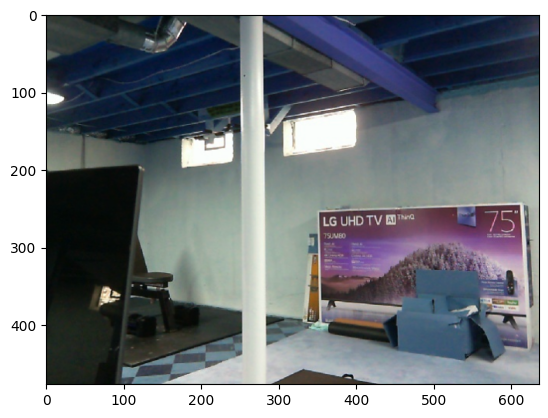

In [137]:
#import image
img = cv.imread('/home/sage/Pictures/{0}/test.jpg'.format(dir))
if resize>0:
        height, width = img.shape[:2]
        img = cv.resize(img,(int(width/3),int(height/3)))
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# plt.imshow(dst)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
# plt.imshow(dst)
cv.imwrite('/home/sage/Pictures/{0}/calibresult.jpg'.format(dir), dst)
crop_orig = img[y:y+h, x:x+w]
cv.imwrite('/home/sage/Pictures/{0}/test_cropped.jpg'.format(dir),crop_orig)